# problem description

I need to scale an input of 380-640 to -400,400. It should be -1 at 475, and 1 at 525.

A third-order polynomial should do the trick.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

/Users/cbs/anaconda/envs/stable/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


(-30, 150)

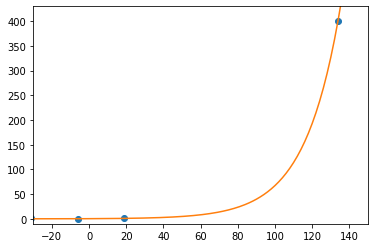

In [93]:
inp = np.array([360, 475, 500, 525, 640])-506
out = np.array([400, 1, 0, 1, 400])

pol = np.polyfit(inp, out, 5)
func = np.poly1d(pol)

x = np.linspace(370, 650, 300, dtype=int) - 506
test = func(x)
exptest = np.exp((x-20)/19)

plt.plot(inp, out, 'o')
plt.plot(x, exptest)
#plt.plot(x, (x-526)/19)
plt.ylim(-10, 430)
plt.xlim(-30, 150)

(370, 650)

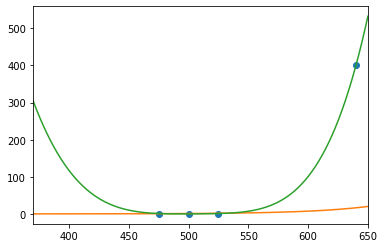

In [61]:
plt.plot(inp, out, 'o')
plt.plot(x, exptest)
plt.plot(x, test)
plt.xlim(370, 650)

(-10, 10)

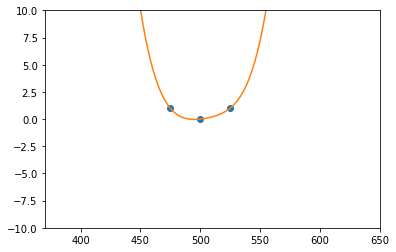

In [32]:
plt.plot(inp, out, 'o')
plt.plot(x, test)
plt.xlim(370, 650)
plt.ylim(-10, 10)

In [33]:
pol

array([ 9.33501144e-10, -1.34254531e-06,  3.32457698e-04,  3.49235482e-01,
       -2.19013773e+02,  3.53779749e+04])

# Resolution of scan

In [95]:
2.5 / 3e-3

833.3333333333334

So, for a 3um resolution, on 2.5mm, I only need 800 px. I will aim at 10um resolution, this gives me a line of 256 points.

In [101]:
2.5 / 256

0.009765625

# Test line
I need a test line, for programming the arduino. I imagine a sinusoid.

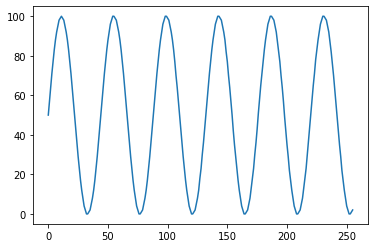

In [117]:
xs = np.arange(256)
ys = np.round(np.sin(xs/7) * 50 + 50)

plt.plot(xs,ys)

In [115]:
ys

array([ 50.,  57.,  64.,  71.,  77.,  83.,  88.,  92.,  95.,  98.,  99.,
       100.,  99.,  98.,  95.,  92.,  88.,  83.,  77.,  71.,  64.,  57.,
        50.,  43.,  36.,  29.,  23.,  17.,  12.,   8.,   4.,   2.,   0.,
         0.,   1.,   2.,   5.,   8.,  12.,  17.,  23.,  29.,  36.,  43.,
        50.,  57.,  64.,  71.,  77.,  83.,  88.,  92.,  96.,  98., 100.,
       100.,  99.,  98.,  95.,  92.,  88.,  83.,  77.,  71.,  64.,  57.,
        50.,  43.,  36.,  29.,  23.,  17.,  12.,   8.,   4.,   2.,   0.,
         0.,   1.,   2.,   5.,   8.,  12.,  17.,  23.,  29.,  36.,  43.,
        50.,  57.,  64.,  71.,  77.,  83.,  88.,  92.,  96.,  98., 100.,
       100.,  99.,  98.,  95.,  92.,  88.,  83.,  77.,  70.,  64.,  57.,
        50.,  43.,  36.,  29.,  23.,  17.,  12.,   8.,   4.,   2.,   0.,
         0.,   1.,   2.,   5.,   8.,  12.,  18.,  23.,  30.,  36.,  43.,
        50.,  57.,  64.,  71.,  77.,  83.,  88.,  92.,  96.,  98., 100.,
       100.,  99.,  98.,  95.,  92.,  88.,  82.,  7

In [127]:
outString = ""
for element in ys:
    
    outString += str(int(element))
    outString += ','

In [128]:
outString

'50,57,64,71,77,83,88,92,95,98,99,100,99,98,95,92,88,83,77,71,64,57,50,43,36,29,23,17,12,8,4,2,0,0,1,2,5,8,12,17,23,29,36,43,50,57,64,71,77,83,88,92,96,98,100,100,99,98,95,92,88,83,77,71,64,57,50,43,36,29,23,17,12,8,4,2,0,0,1,2,5,8,12,17,23,29,36,43,50,57,64,71,77,83,88,92,96,98,100,100,99,98,95,92,88,83,77,70,64,57,50,43,36,29,23,17,12,8,4,2,0,0,1,2,5,8,12,18,23,30,36,43,50,57,64,71,77,83,88,92,96,98,100,100,99,98,95,92,88,82,77,70,64,57,50,42,35,29,23,17,12,8,4,2,0,0,1,2,5,8,13,18,23,30,36,43,51,58,65,71,77,83,88,92,96,98,100,100,99,98,95,92,87,82,77,70,64,57,49,42,35,29,22,17,12,8,4,2,0,0,1,2,5,8,13,18,23,30,37,44,51,58,65,71,78,83,88,92,96,98,100,100,99,98,95,92,87,82,76,70,63,56,49,42,35,29,22,17,12,8,4,2,0,0,1,2,'